## PCA

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [29]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', 
'#137e6d', '#be0119', '#3b638c', '#af6f09', '#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', 
'#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

cmap = mcolors.LinearSegmentedColormap.from_list("", ["#82cafc", "#069af3", "#0485d1", colors[0], colors[8]])

In [54]:
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T

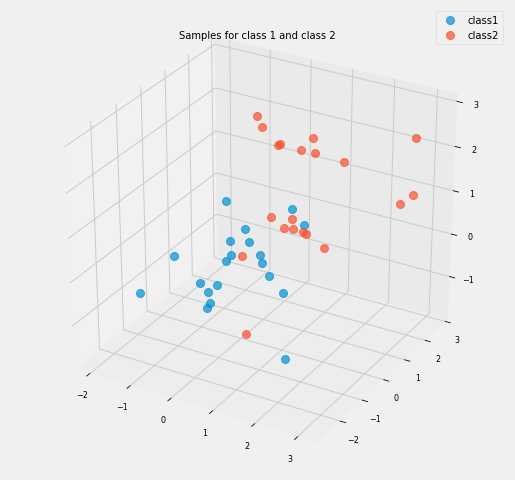

In [55]:

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color=colors[0], alpha=0.7, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], 'o', markersize=8, alpha=0.7, color=colors[1], label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

In [56]:
X = np.concatenate((class1_sample, class2_sample), axis=1)

In [57]:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mv = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:')
print(mean_vector)

Mean Vector:
[[0.68308486]
 [0.731185  ]
 [0.44049157]]


In [58]:
S = np.dot((X-mv),(X-mv).T)
print('Scatter Matrix:\n')
print('{0:s}'.format(S_W))

Scatter Matrix:

[[54.58482025 10.92645151 13.77286018]
 [10.92645151 42.02285858 13.51069451]
 [13.77286018 13.51069451 48.37234909]]


In [59]:
cov_mat = np.cov(X)
print('Covariance Matrix:')
print(cov_mat)

Covariance Matrix:
[[1.09524934 0.36527441 0.50207978]
 [0.36527441 1.57073218 0.51234702]
 [0.50207978 0.51234702 1.42424701]]


In [60]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T

    print('Autovettore {0:d}: {1:s}'.format(i+1, eigvec_sc.T))
    print('Autovalore {0:d} da scatter matrix: {1:12f}'.format(i+1, eig_val_sc[i]))
    print('Autovalore {0:d} da covariance matrix: {1:.12f}'.format(i+1, eig_val_cov[i]))
    print('Rapporto: {0:.12f}'.format(eig_val_sc[i]/eig_val_cov[i]))
    print(40 * '-')

Autovettore 1: [[0.66079143 0.46623317 0.58820177]]
Autovalore 1 da scatter matrix:    74.554049
Autovalore 1 da covariance matrix: 2.317940195435
Rapporto: 32.163922382854
----------------------------------------
Autovettore 2: [[ 0.75056897 -0.40946598 -0.51863651]]
Autovalore 2 da scatter matrix:    39.107071
Autovalore 2 da covariance matrix: 0.731356472032
Rapporto: 53.471969290906
----------------------------------------
Autovettore 3: [[ 0.00095693 -0.78419656  0.62051176]]
Autovalore 3 da scatter matrix:    31.318909
Autovalore 3 da covariance matrix: 1.040931860304
Rapporto: 30.087376298847
----------------------------------------


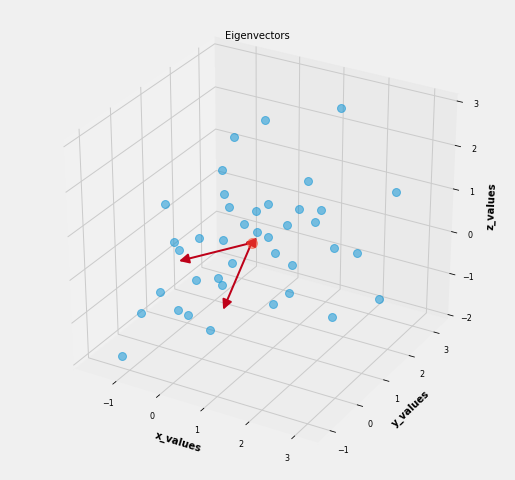

In [61]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color=colors[0], alpha=0.5)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color=colors[1], alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=2, arrowstyle="-|>", color=colors[7])
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [32]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

74.55404853407862
39.107070813217014
31.318908582434688


In [34]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:')
print(matrix_w)

Matrix W:
[[ 0.66079143  0.75056897]
 [ 0.46623317 -0.40946598]
 [ 0.58820177 -0.51863651]]


In [40]:
Xp = matrix_w.T.dot(X-mv)

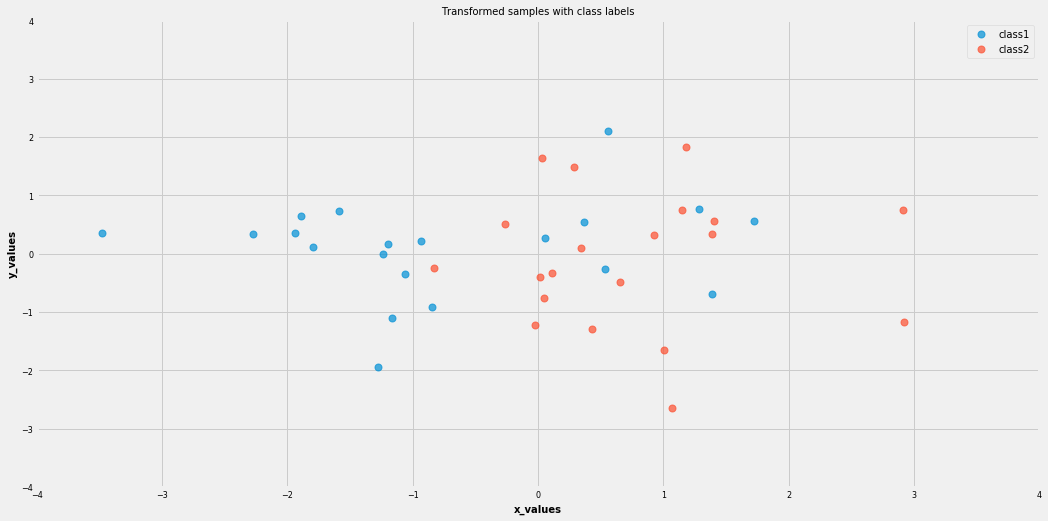

In [41]:
fig = plt.figure(figsize=(16,8))
plt.plot(Xp[0,0:20], Xp[1,0:20], 'o', markersize=7, color=colors[0], alpha=0.7, label='class1')
plt.plot(Xp[0,20:40], Xp[1,20:40], 'o', markersize=7, color=colors[1], alpha=0.7, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

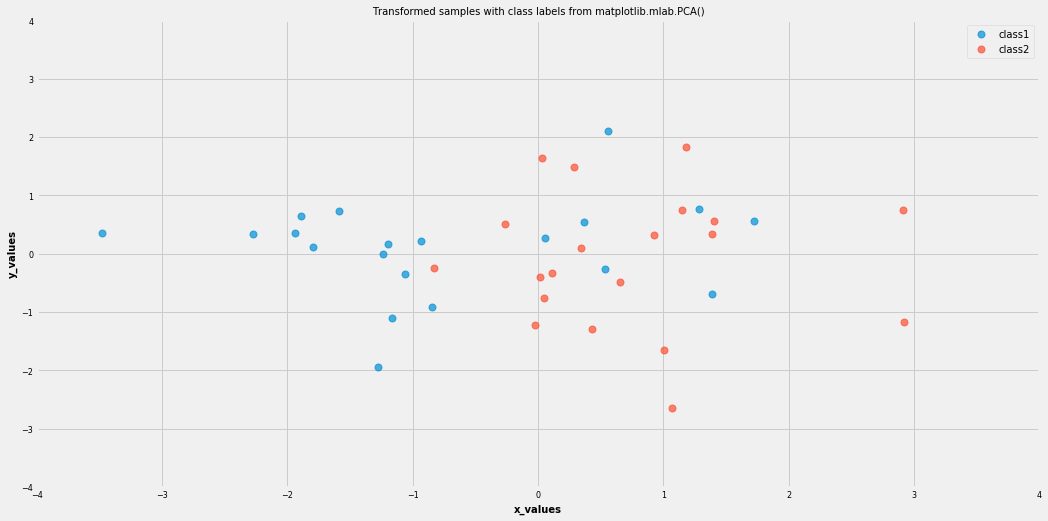

In [43]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = -sklearn_pca.fit_transform((X-mv).T)

fig = plt.figure(figsize=(16,8))
plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color=colors[0], alpha=0.7, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], 'o', markersize=7, color=colors[1], alpha=0.7, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()